In [2]:
import numpy as np
import torch as torch
from matplotlib import pyplot as plt

In [3]:
x = np.arange(2000)  
output_dir = f'../datasets/synthetic_noise2_1/'
mean1 = np.float32(np.load(output_dir+'mean1.npy',allow_pickle=True))
# obs1 =  np.float32(np.load(output_dir+'data.npy',allow_pickle=True))
# plt.plot(x,data[0,:,0])

print(mean1.shape)

(11, 2000)


In [3]:
def get_covariate(data_path,train_step=1500):
    data = np.float32(np.load(data_path+'data.npy',allow_pickle=True))
    mask = np.load(data_path+'mask.npy',allow_pickle=True)
    mask = mask.astype(bool)
    m = data.mean(axis=(0, 1))
    sd = data.std(axis=(0, 1))
    data = (data - m) / sd
    data[mask] = np.nan
    n_units = data.shape[0]-1
    n_units_total = data.shape[0]
    n_treated = 1
    covariates = torch.tensor(data, dtype=torch.float32)
    covariates = covariates.permute((1,0,2))
    n_units_total = n_units + n_treated
    pretreatment_time = train_step
    x_full = covariates[:pretreatment_time,:, 1:].reshape(pretreatment_time,-1,1)
    y_full = covariates[pretreatment_time:,:, 0].detach().clone().reshape(-1,n_units_total,1)
    y_full_all = covariates[pretreatment_time:,:, :]
    y_control = covariates[pretreatment_time:,1:, 0].reshape(500,-1,1)
    t_full = torch.ones_like(x_full)
    mask_full = torch.ones_like(x_full)
    batch_ind_full = torch.arange(n_units_total)
    y_mask_full = (batch_ind_full>0) * 1.0
    
    return (
        (n_units, n_treated, n_units_total),
        x_full,
        t_full,
        mask_full,
        batch_ind_full,
        y_full,
        y_control,
        y_mask_full,
        y_full_all,
        m,
        sd,
    )

In [2]:

ids = [1,2,3]
noise = [0.5,1,2]
for n in noise:
    for id in ids:
        data_path = f'../datasets/synthetic_noise{n}_{id}/'
        mean = np.load(data_path+'mean1.npy')
        (n_tuple,
        x_full,
        t_full,
        mask_full,
        batch_ind_full,
        y_full,
        y_control,
        y_mask_full,
        y_full_all,
        m,sd) = get_covariate(data_path)
        n_units, n_treated, n_units_total = n_tuple    
        X0 = x_full[:, 1:, :]
        mean_gt = mean[0,-500:].reshape(1,500).transpose()
        X0 = X0.permute((0, 2, 1)).reshape(X0.shape[0] * X0.shape[2], X0.shape[1]).cpu().numpy()
        X1 = x_full[:,0, :].reshape(1500,1,1)
        X1 = X1.permute((0, 2, 1)).reshape(X1.shape[0] * X1.shape[2], X1.shape[1]).cpu().numpy()
        Y_control = y_control[:, :, 0].cpu().numpy()
        Y_treated = y_full[:, 0, 0].cpu().numpy().reshape(500,1)
        np.savetxt(data_path+"X0.csv", X0, delimiter=",")
        np.savetxt(data_path+"X1.csv", X1, delimiter=",")
        np.savetxt(data_path+"Y_control.csv", Y_control, delimiter=",")
        np.savetxt(data_path+"Y_treated.csv", Y_treated, delimiter=",")
        np.savetxt(data_path+"ground_truth.csv", mean_gt, delimiter=",")
        np.savetxt(data_path+"m.csv", m, delimiter=",")
        np.savetxt(data_path+"sd.csv", sd, delimiter=",")

NameError: name 'get_covariate' is not defined

In [22]:
dat=np.load('../datasets/synthetic_noise1_1/pred_synctwin.npy')
dat[:,0].shape[0]


500

In [5]:
#Analyze SYncTwin

ids = [1,2,3,4]
noise = [0.5,1,2]
for n in noise:
    for id in ids:
        data_path = f'../datasets/synthetic_noise{n}_{id}/'
        mean = np.load(data_path+'mean1.npy')
        test_mean = mean[0,1500:]
        y_pred = np.load(data_path+'pred_synctwin.npy').transpose(1,0)[0]
        rmse = np.sqrt(np.mean((y_pred - test_mean)**2))
        print(f'RMSE for synthetic_noise{n}_{id} is {rmse}')
        

RMSE for synthetic_noise0.5_1 is 0.5868507684831215
RMSE for synthetic_noise0.5_2 is 0.5822245007634048
RMSE for synthetic_noise0.5_3 is 0.5878745474189652
RMSE for synthetic_noise0.5_4 is 0.5833443860775648
RMSE for synthetic_noise1_1 is 1.1856405594440216
RMSE for synthetic_noise1_2 is 1.2215438750086198
RMSE for synthetic_noise1_3 is 1.159189706614619
RMSE for synthetic_noise1_4 is 1.1900672669089971
RMSE for synthetic_noise2_1 is 0.8720983605505532
RMSE for synthetic_noise2_2 is 0.9056521141252278
RMSE for synthetic_noise2_3 is 0.9125975692159064
RMSE for synthetic_noise2_4 is 0.9207239271485019


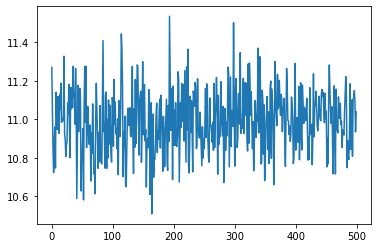

In [5]:
from matplotlib import pyplot as plt
data_path = f'../datasets/synthetic_noise0.5_2/'
y_pred = np.load(data_path+'pred_synctwin.npy').transpose(1,0)[0]
plt.figure()
xrange = np.arange(500)
plt.plot(xrange,y_pred)

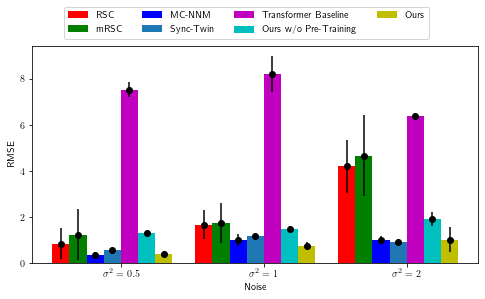

In [79]:
plt.figure(figsize=(8, 4))
N = 3
ind = np.arange(N) 
width = 0.12
conf_factor = 1.645
plt.rcParams['text.usetex'] = True
rsc = [0.8503451185, 1.672286685, 4.200852421]
err = [conf_factor*0.4163216435,conf_factor*0.3844224077,conf_factor*0.7057866953]
bar1 = plt.bar(ind, rsc, width, color = 'r')
plt.errorbar(ind, rsc, yerr=err, fmt="o", color="black")


mrsc = [1.239838633,1.744521901,4.658124995]
bar2 = plt.bar(ind+width, mrsc, width, color='g')
err = [conf_factor*0.67452603, conf_factor*0.5291982874, conf_factor*1.068097006]

plt.errorbar(ind+width, mrsc, yerr=err, fmt="o", color="black")

mcnnm = [0.364593725,1.016289,1.0200599]
bar3 = plt.bar(ind+width*2, mcnnm, width, color = 'b')
err=[conf_factor*0.07545482766,conf_factor*0.1599045426,conf_factor*0.09582034544]
plt.errorbar(ind+2*width, mcnnm, yerr=err, fmt="o", color="black")

synctwin = [0.5850735507,1.189110352,0.9027679928]
bar4 = plt.bar(ind+width*3, synctwin, width)
err=[conf_factor*0.002714846926,conf_factor*0.02556125702,conf_factor*0.02135400547]
plt.errorbar(ind+3*width, synctwin, yerr=err, fmt="o", color="black")


txf_baseline = [7.54, 8.225, 6.4125]
bar5 = plt.bar(ind+4*width,txf_baseline,width, color='m')
err=[conf_factor*0.19,conf_factor*0.47,conf_factor*0.079]
plt.errorbar(ind+4*width, txf_baseline, yerr=err, fmt="o", color="black")

ourswopt = [1.302198383, 1.485600292, 1.919444068]
bar6 = plt.bar(ind+width*5, ourswopt, width,color='c')
err=[conf_factor*0.03245226211,conf_factor*0.06832761535,conf_factor*0.1802255569]
plt.errorbar(ind+5*width, ourswopt, yerr=err, fmt="o", color="black")

ours = [0.3752797864,0.727910423,1.018899836]
bar7 = plt.bar(ind+width*6, ours, width, color='y')
err=[conf_factor*0.0578827234,conf_factor*0.1071729752,conf_factor*0.3290758851]

plt.errorbar(ind+6*width, ours, yerr=err, fmt="o", color="black")

  
plt.xlabel("Noise")
plt.ylabel('RMSE')
  
plt.xticks(ind+3.5*width,['$\sigma^2=0.5$', '$\sigma^2=1$', '$\sigma^2=2$'])
plt.legend( (bar1, bar2, bar3,bar4,bar5,bar6, bar7), ('RSC', 'mRSC', 'MC-NNM', 'Sync-Twin','Transformer Baseline','Ours w/o Pre-Training','Ours'),ncol=4, bbox_to_anchor=(0.9,1.2),fontsize=10)

plt.savefig(f'./figs/noise_err.png',bbox_inches='tight')

In [2]:
donor = [21,26,51,76,101]
import os
T=2000
for d in donor:
    inp_dir = f'../datasets/synthetic_data_N_{d}/'
    mean1 = np.float32(np.load(inp_dir+'mean1.npy',allow_pickle=True))
    mean2 = np.float32(np.load(inp_dir+'mean2.npy',allow_pickle=True))
    mask = np.float32(np.load(inp_dir+'mask.npy',allow_pickle=True))
    for i in range(3):
        output_dir =  f'../datasets/synthetic_data_N_{d}_{i+1}/'
        if not(os.path.exists(output_dir)):
            os.makedirs(output_dir)
        obs1 = mean1 + np.random.normal(0,1,mean1.shape)
        obs2 = mean2 + np.random.normal(0,1,mean2.shape)
        combined_observation = np.zeros((d,T,2))
        combined_observation[:,:,0] = obs1
        combined_observation[:,:,1] = obs2
        np.save(output_dir+'data.npy',combined_observation)
        np.save(output_dir+'mask.npy',mask)
        np.save(output_dir+'obs1.npy',obs1)
        np.save(output_dir+'obs2.npy',obs2)
        np.save(output_dir+'mean1.npy',mean1)
        np.save(output_dir+'mean2.npy',mean2)

In [5]:
ids = [1,2,3]
donor = [21, 26,51,76, 101]
for d in donor:
    for id in ids:
        data_path = f'../datasets/synthetic_data_N_{d}_{id}/'
        mean = np.load(data_path+'mean1.npy')
        (n_tuple,
        x_full,
        t_full,
        mask_full,
        batch_ind_full,
        y_full,
        y_control,
        y_mask_full,
        y_full_all,
        m,sd) = get_covariate(data_path)
        n_units, n_treated, n_units_total = n_tuple    
        X0 = x_full[:, 1:, :]
        mean_gt = mean[0,-500:].reshape(1,500).transpose()
        X0 = X0.permute((0, 2, 1)).reshape(X0.shape[0] * X0.shape[2], X0.shape[1]).cpu().numpy()
        X1 = x_full[:,0, :].reshape(1500,1,1)
        X1 = X1.permute((0, 2, 1)).reshape(X1.shape[0] * X1.shape[2], X1.shape[1]).cpu().numpy()
        Y_control = y_control[:, :, 0].cpu().numpy()
        Y_treated = y_full[:, 0, 0].cpu().numpy().reshape(500,1)
        np.savetxt(data_path+"X0.csv", X0, delimiter=",")
        np.savetxt(data_path+"X1.csv", X1, delimiter=",")
        np.savetxt(data_path+"Y_control.csv", Y_control, delimiter=",")
        np.savetxt(data_path+"Y_treated.csv", Y_treated, delimiter=",")
        np.savetxt(data_path+"ground_truth.csv", mean_gt, delimiter=",")
        np.savetxt(data_path+"m.csv", m, delimiter=",")
        np.savetxt(data_path+"sd.csv", sd, delimiter=",")

In [7]:
#Analyze SYncTwin for donor

ids = [1,2,3]
donors = [21, 26,51,76,101]
for d in donors:
    for id in ids:
        data_path = f'../datasets/synthetic_data_N_{d}_{id}/'
        mean = np.load(data_path+'mean1.npy')
        test_mean = mean[0,1500:]
        y_pred = np.load(data_path+'pred_synctwin.npy').transpose(1,0)[0]
        rmse = np.sqrt(np.mean((y_pred - test_mean)**2))
        print(f'RMSE for synthetic_data_{d}_{id} is {rmse}')
        

RMSE for synthetic_data_21_1 is 0.23200124502182007
RMSE for synthetic_data_21_2 is 0.2287212312221527
RMSE for synthetic_data_21_3 is 0.24171431362628937
RMSE for synthetic_data_26_1 is 0.8102737069129944
RMSE for synthetic_data_26_2 is 0.775956928730011
RMSE for synthetic_data_26_3 is 0.7785501480102539
RMSE for synthetic_data_51_1 is 0.4610901474952698
RMSE for synthetic_data_51_2 is 0.4564529359340668
RMSE for synthetic_data_51_3 is 0.4621337652206421
RMSE for synthetic_data_76_1 is 1.3693206310272217
RMSE for synthetic_data_76_2 is 1.3669123649597168
RMSE for synthetic_data_76_3 is 1.3726298809051514
RMSE for synthetic_data_101_1 is 0.47864922881126404
RMSE for synthetic_data_101_2 is 0.4856833219528198
RMSE for synthetic_data_101_3 is 0.4874782860279083


In [52]:

missing = [0.1,0.2,0.3,0.5,0.8]
for m in missing: 
    data_path = f'../datasets/synthetic_data_missing_{m}/'
    mean = np.load(data_path+'mean1.npy')
    (n_tuple,
    x_full,
    t_full,
    mask_full,
    batch_ind_full,
    y_full,
    y_control,
    y_mask_full,
    y_full_all,
    m,sd) = get_covariate(data_path)
    n_units, n_treated, n_units_total = n_tuple    
    X0 = x_full[:, 1:, :]
    mean_gt = mean[0,-500:].reshape(1,500).transpose()
    X0 = X0.permute((0, 2, 1)).reshape(X0.shape[0] * X0.shape[2], X0.shape[1]).cpu().numpy()
    X1 = x_full[:,0, :].reshape(1500,1,1)
    X1 = X1.permute((0, 2, 1)).reshape(X1.shape[0] * X1.shape[2], X1.shape[1]).cpu().numpy()
    Y_control = y_control[:, :, 0].cpu().numpy()
    Y_treated = y_full[:, 0, 0].cpu().numpy().reshape(500,1)
    np.savetxt(data_path+"X0.csv", X0, delimiter=",")
    np.savetxt(data_path+"X1.csv", X1, delimiter=",")
    np.savetxt(data_path+"Y_control.csv", Y_control, delimiter=",")
    np.savetxt(data_path+"Y_treated.csv", Y_treated, delimiter=",")
    np.savetxt(data_path+"ground_truth.csv", mean_gt, delimiter=",")
    np.savetxt(data_path+"m.csv", m, delimiter=",")
    np.savetxt(data_path+"sd.csv", sd, delimiter=",")

In [7]:
data_path = f'../datasets/prop99/'
# mean = np.load(data_path+'mean1.npy')
pretreatment_time=18    
data = np.float32(np.load(data_path+'data.npy',allow_pickle=True))
mask = np.load(data_path+'mask.npy',allow_pickle=True)
mask = mask.astype(bool)
m = data.mean(axis=(0, 1))
sd = data.std(axis=(0, 1))
data = (data - m) / sd
data[mask] = np.nan
n_units = data.shape[0]-1
n_units_total = data.shape[0]
n_treated = 1
covariates = torch.tensor(data, dtype=torch.float32)
covariates = covariates.permute((1,0,2))
n_units_total = n_units + n_treated
x_full = covariates[:pretreatment_time,:, 1:].reshape(pretreatment_time,-1,4)
y_full = covariates[pretreatment_time:,:, 0].detach().clone().reshape(-1,n_units_total,1)
y_full_all = covariates[pretreatment_time:,:, :]
y_control = torch.cat((covariates[pretreatment_time:,:2, 0],covariates[pretreatment_time:,3:, 0]),dim=1).reshape(13,-1,1)
t_full = torch.ones_like(x_full)
mask_full = torch.ones_like(x_full)
batch_ind_full = torch.arange(n_units_total)
X0 = torch.cat((x_full[:, :2, :],x_full[:, 3:, :]),dim=1)
X0 = X0.permute((0, 2, 1)).reshape(X0.shape[0] * X0.shape[2], X0.shape[1]).cpu().numpy()
X1 = x_full[:,2, :].reshape(18,1,4)
X1 = X1.permute((0, 2, 1)).reshape(X1.shape[0] * X1.shape[2], X1.shape[1]).cpu().numpy()
Y_control = y_control[:, :, 0].cpu().numpy()
Y_treated = y_full[:, 2, 0].cpu().numpy().reshape(13,1)
np.savetxt(data_path+"X0.csv", X0, delimiter=",")
np.savetxt(data_path+"X1.csv", X1, delimiter=",")
np.savetxt(data_path+"Y_control.csv", Y_control, delimiter=",")
np.savetxt(data_path+"Y_treated.csv", Y_treated, delimiter=",")
np.savetxt(data_path+"m.csv", m, delimiter=",")
np.savetxt(data_path+"sd.csv", sd, delimiter=",")

In [12]:
import os
data_path = f'../datasets/asthma_placebo/'
pretreatment_time=7 
data = np.float32(np.load(data_path+'data.npy',allow_pickle=True))
mask = np.load(data_path+'mask.npy',allow_pickle=True)
mask = mask.astype(bool)
m = data.mean(axis=(0, 1))
sd = data.std(axis=(0, 1))
data = (data - m) / sd
data[mask] = np.nan
n_units = data.shape[0]-1
n_units_total = data.shape[0]
n_treated = 1
covariates = torch.tensor(data, dtype=torch.float32)
covariates = covariates.permute((1,0,2))
n_units_total = n_units + n_treated
x_full = covariates[:pretreatment_time,:, 1:].reshape(pretreatment_time,-1,15)
y_full = covariates[pretreatment_time:,:, 0].detach().clone().reshape(-1,n_units_total,1)
y_full_all = covariates[pretreatment_time:,:, :]
y_control = covariates[pretreatment_time:,1:, 0].reshape(13,-1,1)
t_full = torch.ones_like(x_full)
mask_full = torch.ones_like(x_full)
batch_ind_full = torch.arange(n_units_total)
X0 = x_full[:, 1:, :]
X0 = X0.permute((0, 2, 1)).reshape(X0.shape[0] * X0.shape[2], X0.shape[1]).cpu().numpy()
X1 = x_full[:,0, :].reshape(7,1,15)
X1 = X1.permute((0, 2, 1)).reshape(X1.shape[0] * X1.shape[2], X1.shape[1]).cpu().numpy()
Y_control = y_control[:, :, 0].cpu().numpy()
Y_treated = y_full[:, 0, 0].cpu().numpy().reshape(13,1)

data_path_new = '../datasets/asthma_7/'
# os.makedirs(data_path_new)
np.savetxt(data_path_new+"X0.csv", X0, delimiter=",")
np.savetxt(data_path_new+"X1.csv", X1, delimiter=",")
np.savetxt(data_path_new+"Y_control.csv", Y_control, delimiter=",")
np.savetxt(data_path_new+"Y_treated.csv", Y_treated, delimiter=",")
np.savetxt(data_path_new+"m.csv", m, delimiter=",")
np.savetxt(data_path_new+"sd.csv", sd, delimiter=",")

In [13]:
import os
data_path = f'../datasets/asthma_placebo/'
pretreatment_time=15
data = np.float32(np.load(data_path+'data.npy',allow_pickle=True))
mask = np.load(data_path+'mask.npy',allow_pickle=True)
mask = mask.astype(bool)
m = data.mean(axis=(0, 1))
sd = data.std(axis=(0, 1))
data = (data - m) / sd
data[mask] = np.nan
n_units = data.shape[0]-1
n_units_total = data.shape[0]
n_treated = 1
covariates = torch.tensor(data, dtype=torch.float32)
covariates = covariates.permute((1,0,2))
n_units_total = n_units + n_treated
x_full = covariates[:pretreatment_time,:, 1:].reshape(pretreatment_time,-1,15)
y_full = covariates[pretreatment_time:,:, 0].detach().clone().reshape(-1,n_units_total,1)
y_full_all = covariates[pretreatment_time:,:, :]
y_control = covariates[pretreatment_time:,1:, 0].reshape(5,-1,1)
t_full = torch.ones_like(x_full)
mask_full = torch.ones_like(x_full)
batch_ind_full = torch.arange(n_units_total)
X0 = x_full[:, 1:, :]
X0 = X0.permute((0, 2, 1)).reshape(X0.shape[0] * X0.shape[2], X0.shape[1]).cpu().numpy()
X1 = x_full[:,0, :].reshape(15,1,15)
X1 = X1.permute((0, 2, 1)).reshape(X1.shape[0] * X1.shape[2], X1.shape[1]).cpu().numpy()
Y_control = y_control[:, :, 0].cpu().numpy()
Y_treated = y_full[:, 0, 0].cpu().numpy().reshape(5,1)
data_path_new = '../datasets/asthma_15/'
# os.makedirs(data_path_new)
np.savetxt(data_path_new+"X0.csv", X0, delimiter=",")
np.savetxt(data_path_new+"X1.csv", X1, delimiter=",")
np.savetxt(data_path_new+"Y_control.csv", Y_control, delimiter=",")
np.savetxt(data_path_new+"Y_treated.csv", Y_treated, delimiter=",")
np.savetxt(data_path_new+"m.csv", m, delimiter=",")
np.savetxt(data_path_new+"sd.csv", sd, delimiter=",")

In [10]:
import os
data_path = f'../datasets/asthma_placebo/'
pretreatment_time=7 

for i in range(5):
    data = np.float32(np.load(data_path+'data.npy',allow_pickle=True))
    mask = np.load(data_path+'mask.npy',allow_pickle=True)
    mask = mask.astype(bool)
    m = data.mean(axis=(0, 1))
    sd = data.std(axis=(0, 1))
    data = (data - m) / sd
    data[mask] = np.nan
    n_units = data.shape[0]-1
    n_units_total = data.shape[0]
    n_treated = 1
    covariates = torch.tensor(data, dtype=torch.float32)
    covariates = covariates.permute((1,0,2))
    n_units_total = n_units + n_treated
    x_full = covariates[:pretreatment_time,:, 1:].reshape(pretreatment_time,-1,15)
    y_full = covariates[pretreatment_time:,:, 0].detach().clone().reshape(-1,n_units_total,1)
    y_full_all = covariates[pretreatment_time:,:, :]
    y_control = torch.cat((covariates[pretreatment_time:,:i, 0],covariates[pretreatment_time:,i+1:, 0]),1).reshape(13,-1,1)
    t_full = torch.ones_like(x_full)
    mask_full = torch.ones_like(x_full)
    batch_ind_full = torch.arange(n_units_total)
    X0 = torch.cat((x_full[:, :i, :],x_full[:, i+1:, :]),1)
    X0 = X0.permute((0, 2, 1)).reshape(X0.shape[0] * X0.shape[2], X0.shape[1]).cpu().numpy()
    X1 = x_full[:,i, :].reshape(7,1,15)
    X1 = X1.permute((0, 2, 1)).reshape(X1.shape[0] * X1.shape[2], X1.shape[1]).cpu().numpy()
    Y_control = y_control[:, :, 0].cpu().numpy()
    Y_treated = y_full[:, i, 0].cpu().numpy().reshape(13,1)

    data_path_new = f'../datasets/asthma_7_{i+1}/'
    if not os.path.exists(data_path_new):
        os.makedirs(data_path_new)
    np.savetxt(data_path_new+"X0.csv", X0, delimiter=",")
    np.savetxt(data_path_new+"X1.csv", X1, delimiter=",")
    np.savetxt(data_path_new+"Y_control.csv", Y_control, delimiter=",")
    np.savetxt(data_path_new+"Y_treated.csv", Y_treated, delimiter=",")
    np.savetxt(data_path_new+"m.csv", m, delimiter=",")
    np.savetxt(data_path_new+"sd.csv", sd, delimiter=",")

In [12]:
import os
data_path = f'../datasets/asthma_placebo/'
pretreatment_time=15

for i in range(5):
    data = np.float32(np.load(data_path+'data.npy',allow_pickle=True))
    mask = np.load(data_path+'mask.npy',allow_pickle=True)
    mask = mask.astype(bool)
    m = data.mean(axis=(0, 1))
    sd = data.std(axis=(0, 1))
    data = (data - m) / sd
    data[mask] = np.nan
    n_units = data.shape[0]-1
    n_units_total = data.shape[0]
    n_treated = 1
    covariates = torch.tensor(data, dtype=torch.float32)
    covariates = covariates.permute((1,0,2))
    n_units_total = n_units + n_treated
    x_full = covariates[:pretreatment_time,:, 1:].reshape(pretreatment_time,-1,15)
    y_full = covariates[pretreatment_time:,:, 0].detach().clone().reshape(-1,n_units_total,1)
    y_full_all = covariates[pretreatment_time:,:, :]
    y_control = torch.cat((covariates[pretreatment_time:,:i, 0],covariates[pretreatment_time:,i+1:, 0]),1).reshape(5,-1,1)
    t_full = torch.ones_like(x_full)
    mask_full = torch.ones_like(x_full)
    batch_ind_full = torch.arange(n_units_total)
    X0 = torch.cat((x_full[:, :i, :],x_full[:, i+1:, :]),1)
    X0 = X0.permute((0, 2, 1)).reshape(X0.shape[0] * X0.shape[2], X0.shape[1]).cpu().numpy()
    X1 = x_full[:,i, :].reshape(15,1,15)
    X1 = X1.permute((0, 2, 1)).reshape(X1.shape[0] * X1.shape[2], X1.shape[1]).cpu().numpy()
    Y_control = y_control[:, :, 0].cpu().numpy()
    Y_treated = y_full[:, i, 0].cpu().numpy().reshape(5,1)
    data_path_new = f'../datasets/asthma_15_{i+1}/'
    if not os.path.exists(data_path_new):
        os.makedirs(data_path_new)
    np.savetxt(data_path_new+"X0.csv", X0, delimiter=",")
    np.savetxt(data_path_new+"X1.csv", X1, delimiter=",")
    np.savetxt(data_path_new+"Y_control.csv", Y_control, delimiter=",")
    np.savetxt(data_path_new+"Y_treated.csv", Y_treated, delimiter=",")
    np.savetxt(data_path_new+"m.csv", m, delimiter=",")
    np.savetxt(data_path_new+"sd.csv", sd, delimiter=",")

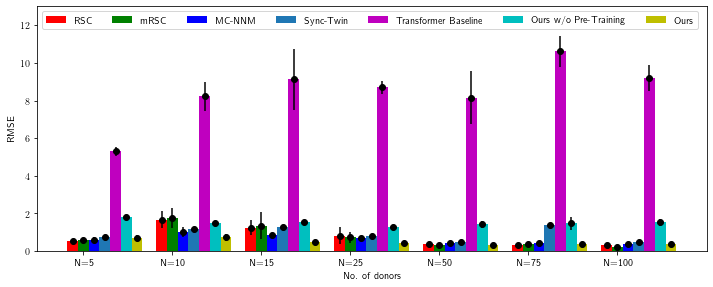

In [5]:
plt.figure(figsize=(12, 4.5))
N = 7
ind = np.arange(N) 
width = 0.12
conf_factor = 1.645
plt.rcParams['text.usetex'] = True
rsc = [0.5318848978,1.672286685,1.243074754,0.827118,0.379,0.3449,0.32215]
err = [conf_factor*0.04481861918,conf_factor*0.2844224077,conf_factor*0.2511097792,
    conf_factor*0.2821048542, conf_factor*0.04287442245, conf_factor*0.009319494478,conf_factor*0.04390123405]
bar1 = plt.bar(ind, rsc, width, color = 'r')
plt.errorbar(ind, rsc, yerr=err, fmt="o", color="black")
  
mrsc = [0.5771393626,1.744521901,1.352331649,0.729332,0.3152257667,0.356099,0.225979]
bar2 = plt.bar(ind+width, mrsc, width, color='g')
err = [conf_factor*0.04395395824,conf_factor*0.3291982874,conf_factor*0.4388816793,
conf_factor*0.1784950729, conf_factor*0.03622892187, conf_factor*0.06576390851, conf_factor*0.07301673933]
plt.errorbar(ind+width, mrsc, yerr=err, fmt="o", color="black")

mcnnm = [0.6091866667,1.016289,0.8802990667,0.682, 0.4283333333, 0.4124266667, 0.4018333333]
bar3 = plt.bar(ind+width*2, mcnnm, width, color = 'b')
err=[conf_factor*0.07224458826,conf_factor*0.1599045426,conf_factor*0.04570427453,
conf_factor*0.03482814953, conf_factor*0.01342882472, conf_factor*0.0198430878, conf_factor*0.01685477183]
plt.errorbar(ind+2*width, mcnnm, yerr=err, fmt="o", color="black")

synctwin = [0.7559417685,1.189110352,1.262274027,0.7882566667, 0.4598916667,1.369616333, 0.483931]
bar4 = plt.bar(ind+width*3, synctwin, width)
err=[conf_factor*0.007085090233,conf_factor*0.02556125702,conf_factor*0.006939178864,
conf_factor*0.01910837862, conf_factor*0.00302414324, conf_factor*0.002875972937, conf_factor*0.004668442246]
plt.errorbar(ind+3*width, synctwin, yerr=err, fmt="o", color="black")


txf_baseline = [5.293333333,8.225,9.14,8.711072333, 8.162, 10.6126, 9.19]
bar5 = plt.bar(ind+width*4, txf_baseline, width, color='m')
err=[conf_factor*0.1563116545,conf_factor*0.4671,conf_factor*0.9865089964,
conf_factor*0.206,conf_factor*0.853,conf_factor*0.4935,conf_factor*0.4134]
plt.errorbar(ind+4*width, txf_baseline, yerr=err, fmt="o", color="black")

ourswopt = [1.8155782, 1.485600292, 1.5715326, 1.266133333,1.415,1.4787,1.538]
bar6 = plt.bar(ind+width*5, ourswopt, width,color='c')
err=[conf_factor*0.05470868906,conf_factor*0.06832761535,conf_factor*0.02610672324,
conf_factor*0.04325810136, conf_factor*0.105, conf_factor*0.2115905716, conf_factor*0.1132475165]
plt.errorbar(ind+5*width, ourswopt, yerr=err, fmt="o", color="black")

ours = [0.69231387,0.727910423,0.4790343833,0.4417, 0.3396666667, 0.3566666667, 0.388]
bar7 = plt.bar(ind+width*6, ours, width,color='y')
err=[conf_factor*0.09237887116,conf_factor*0.1071729752,conf_factor*0.05278030101,
conf_factor*0.02910206178, conf_factor*0.005859465277, conf_factor*0.03879862541, conf_factor*0.02163330765]
plt.errorbar(ind+6*width, ours, yerr=err, fmt="o", color="black")

  
plt.xlabel("No. of donors")
plt.ylabel('RMSE')

ax = plt.gca()
ax.set_ylim([0, 13])
  
plt.xticks(ind+width,['N=5', 'N=10', 'N=15','N=25','N=50','N=75','N=100'])
plt.legend((bar1, bar2, bar3,bar4,bar5,bar6, bar7), ('RSC', 'mRSC', 'MC-NNM', 'Sync-Twin','Transformer Baseline','Ours w/o Pre-Training','Ours'),ncol=8, loc='upper left',fontsize=10)

plt.savefig(f'./figs/donor_err.pdf',bbox_inches='tight')

In [ ]:
plt.figure(figsize=(8, 4))
N = 4
ind = np.arange(N) 
width = 0.15
plt.rcParams['text.usetex'] = True
rsc = [0.5318848978,1.672286685,1.243074754,1.040265811]
err = [0.04481861918,0.3844224077,0.2511097792,0.1476792071]
bar1 = plt.bar(ind, rsc, width, color = 'r')
plt.errorbar(ind, rsc, yerr=err, fmt="o", color="black")
  
mrsc = [0.5771393626,1.744521901,1.352331649,0.7895873137]
bar2 = plt.bar(ind+width, mrsc, width, color='g')
err = [0.04395395824,0.5291982874,0.6388816793,0.3603538147]
plt.errorbar(ind+width, mrsc, yerr=err, fmt="o", color="black")

mcnnm = [0.6091866667,1.016289,0.8802990667,0.4005206667]
bar3 = plt.bar(ind+width*2, mcnnm, width, color = 'b')
err=[0.07224458826,0.1599045426,0.04570427453,0.0387286003]
plt.errorbar(ind+2*width, mcnnm, yerr=err, fmt="o", color="black")

synctwin = [0.7559417685,1.189110352,1.262274027,0.2341455966]
bar4 = plt.bar(ind+width*3, synctwin, width)
err=[0.007085090233,0.02556125702,0.006939178864,0.00675675443]
plt.errorbar(ind+3*width, synctwin, yerr=err, fmt="o", color="black")

ours = [0.69231387,0.727910423,0.4790343833,0.6605274333]
bar5 = plt.bar(ind+width*4, ours, width)
err=[0.09237887116,0.1071729752,0.05278030101,0.03950925209]
plt.errorbar(ind+4*width, ours, yerr=err, fmt="o", color="black")

  
plt.xlabel("No. of donors")
plt.ylabel('RMSE')
  
plt.xticks(ind+width,['N=5', 'N=10', 'N=15','N=20'])
plt.legend( (bar1, bar2, bar3,bar4,bar5), ('RSC', 'mRSC', 'MC-NNM', 'SycnTwin','Ours') )

plt.savefig(f'./figs/donor_err.pdf',bbox_inches='tight')

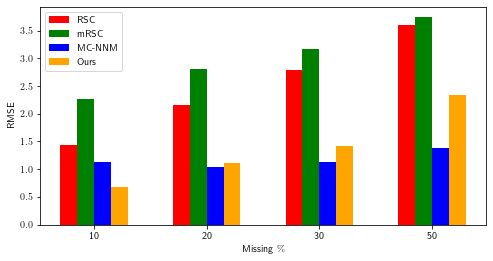

In [10]:
plt.figure(figsize=(8, 4))
N = 4
ind = np.arange(N) 
width = 0.15
plt.rcParams['text.usetex'] = True
rsc = [1.44,2.16,2.79,3.6]
# err = [0.04481861918,0.3844224077,0.2511097792,0.1476792071]
bar1 = plt.bar(ind, rsc, width, color = 'r')
# plt.errorbar(ind, rsc, yerr=err, fmt="o", color="black")
  
mrsc = [2.26,2.80,3.17,3.74]
bar2 = plt.bar(ind+width, mrsc, width, color='g')
# err = [0.04395395824,0.5291982874,0.6388816793,0.3603538147]
# plt.errorbar(ind+width, mrsc, yerr=err, fmt="o", color="black")

mcnnm = [1.132026,1.04771,1.124204,1.378365]
bar3 = plt.bar(ind+width*2, mcnnm, width, color = 'b')


ours = [0.68,1.11,1.42,2.34]
bar4 = plt.bar(ind+width*3, ours, width,color='orange')

  
plt.xlabel("Missing $\%$")
plt.ylabel('RMSE')
  
plt.xticks(ind+1.5*width,['10', '20', '30','50'])
plt.legend( (bar1, bar2, bar3,bar4), ('RSC', 'mRSC', 'MC-NNM', 'Ours') )

plt.savefig(f'./figs/missing_bar.pdf',bbox_inches='tight')

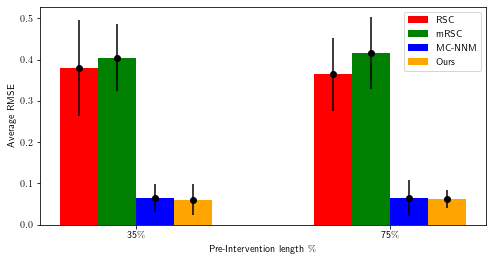

In [4]:
plt.figure(figsize=(8, 4))
N = 2
conf_factor = 1.645
ind = np.arange(N) 
width = 0.15
plt.rcParams['text.usetex'] = True
rsc = [0.3801943848, 0.3641532629]
err = [conf_factor*0.07049792106,conf_factor*0.05441114717]
bar1 = plt.bar(ind, rsc, width, color = 'r')
plt.errorbar(ind, rsc, yerr=err, fmt="o", color="black")
  
mrsc = [0.4052312966, 0.4161708187]
bar2 = plt.bar(ind+width, mrsc, width, color='g')
err = [conf_factor*0.04922885774,conf_factor*0.05242301897]
plt.errorbar(ind+width, mrsc, yerr=err, fmt="o", color="black")

mcnnm = [0.06453899495, 0.06483419726]
bar3 = plt.bar(ind+width*2, mcnnm, width, color = 'b')
err = [conf_factor*0.02047056564,conf_factor*0.02630727555]
plt.errorbar(ind+2*width, mcnnm, yerr=err, fmt="o", color="black")

ours = [0.06027073668, 0.06169093249]
bar4 = plt.bar(ind+width*3, ours, width,color='orange')
err = [conf_factor*0.02304352197,conf_factor*0.0133012522]
plt.errorbar(ind+3*width,ours, yerr=err, fmt="o", color="black")

  
plt.xlabel("Pre-Intervention length $\%$")
plt.ylabel('Average RMSE')
  
plt.xticks(ind+1.5*width,['35$\%$', '75$\%$'])
plt.legend( (bar1, bar2, bar3,bar4), ('RSC', 'mRSC', 'MC-NNM', 'Ours') )

plt.savefig(f'./figs/asthma_bar.pdf',bbox_inches='tight')